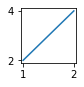

In [1]:
# For some reason this seems to be necessary in anaconda to stop matplotlib crashing
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(1,1))

plt.plot([1,2],[2,4])
plt.show()

In [2]:
# Now import everything else
import numpy as np
import pylab
import time
import scipy
from scipy.interpolate import interp2d

# Camera Object

In [3]:
# Make a camera object
#from CamFLIR import CamFLIR
import imp
import CamHamThread
imp.reload(CamHamThread)
#del(CamHamThread)
from CamHamThread import CamHamThread
cam=CamHamThread(exposure=0.3,SensitivityGain=1,CCDMode="EMCCD")


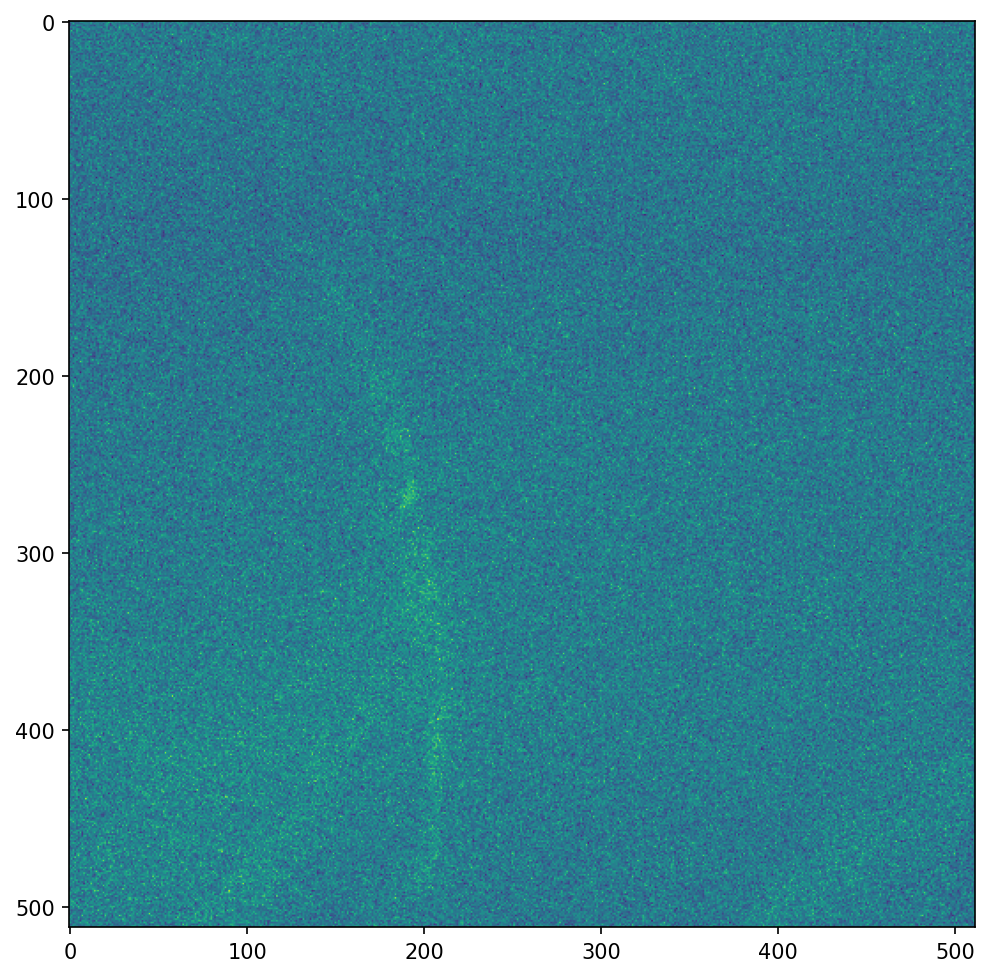

In [64]:
#This is how you
#take a photo

img=cam.Snap(1)[0]
np.savetxt('/Users/LabUser/Documents/Image captures/OliviaSveFrmCde/myphoto.txt', img)

fig=plt.figure(figsize=(8,8),dpi=150)
gs = fig.add_gridspec(1, 1, hspace=0, wspace=0)
axes= gs.subplots(sharex='col', sharey='row')
axes.imshow(img)



In [4]:
print(5)

5


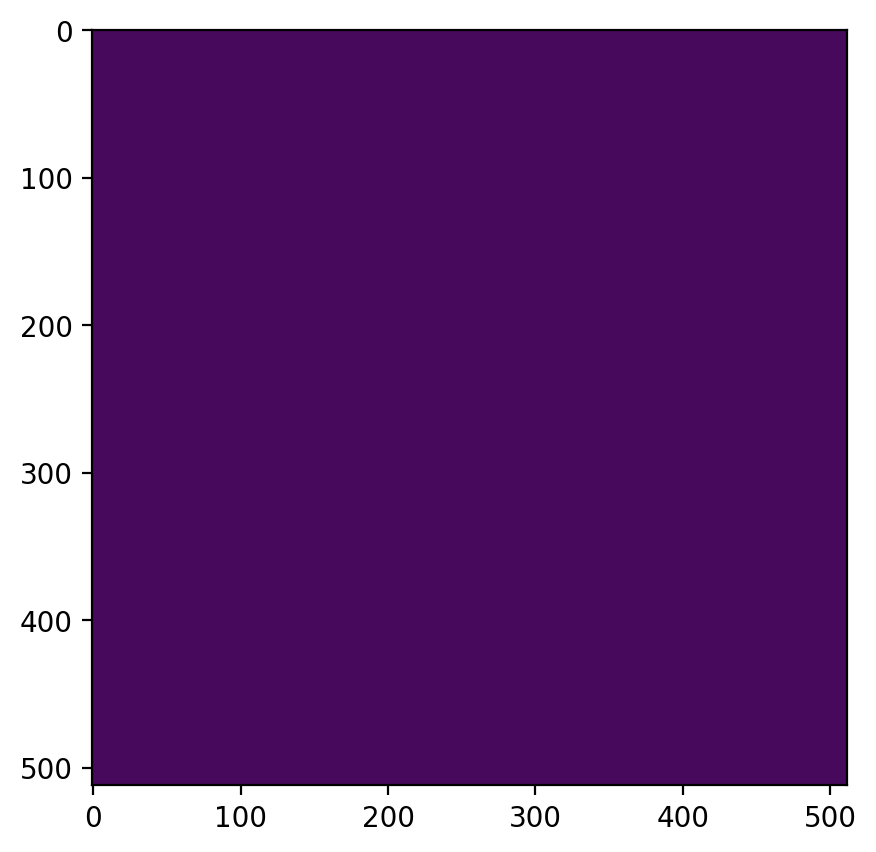

In [5]:
#and plot it
plt.figure(figsize=(5,5),dpi=200)
pylab.imshow(img,clim=(200,70000))

# Stage Object

In [4]:
#Initiate a stage object
#import imp
#import Stage
#imp.reload(Stage)
from Stage import Stage
stg=Stage()

In [100]:
stg.MoveToX(3.0)
stg.MoveToY(0)
stg.MoveToZ(3.6275)
#stg.MoveToZ(3.5279)


'''
stg.MoveToX(6.5)
stg.MoveToY(-4)
stg.MoveToZ(3.43)
'''

'\nstg.MoveToX(6.5)\nstg.MoveToY(-4)\nstg.MoveToZ(3.43)\n'

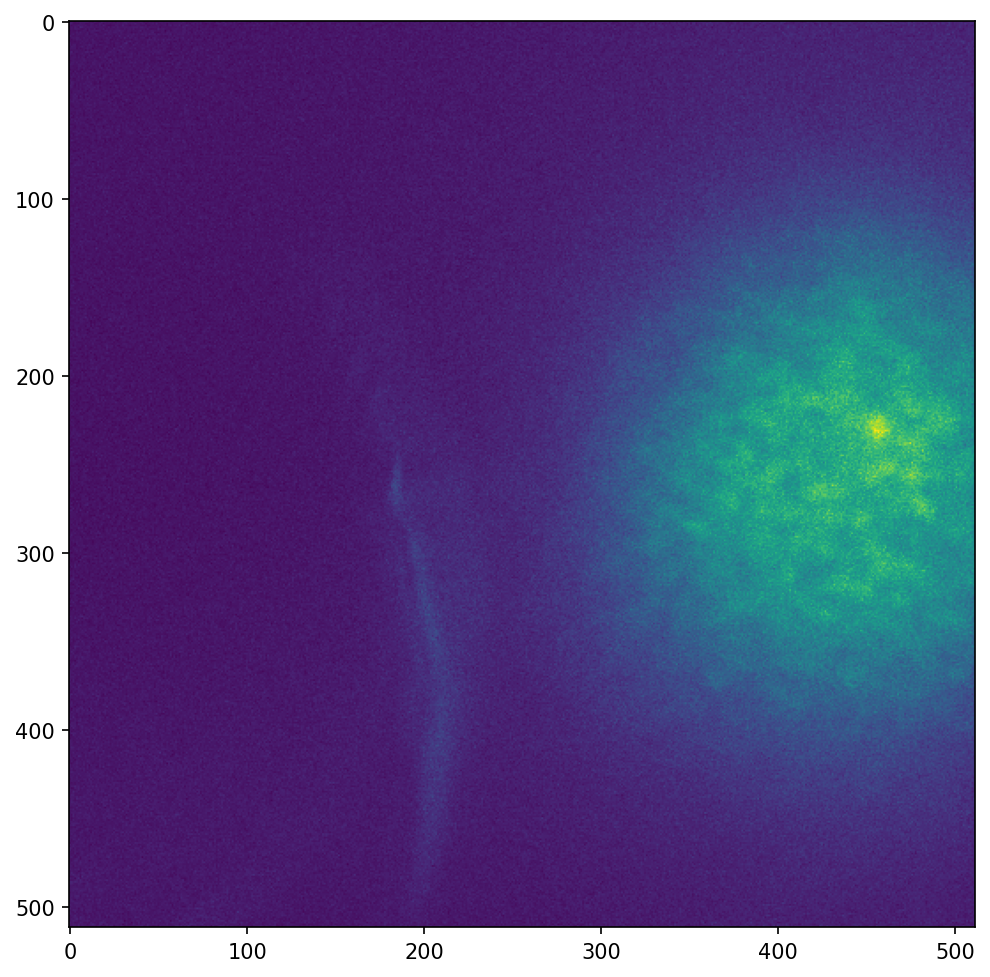

In [101]:
#cam=CamHamThread(exposure=0.3,SensitivityGain=1,CCDMode="EMCCD")
img=cam.Snap(1)[0]

fig=plt.figure(figsize=(8,8),dpi=150)
gs = fig.add_gridspec(1, 1, hspace=0, wspace=0)
axes= gs.subplots(sharex='col', sharey='row')
axes.imshow(img)

In [5]:
FocalPoints=[]
def RecordFocus():
    FocalPoints.append([stg.X,stg.Y,stg.Z])
    print(FocalPoints)
    return FocalPoints

In [4]:
print("Stage at ",stg.X,stg.Y,stg.Z)

NameError: name 'stg' is not defined

In [15]:
fourCorners = RecordFocus()

[[-0.74, 2, 3.4159], [-3.74, -2, 3.45], [-2.74, 0, 3.4], [-1.74, -1, 3.43]]


In [16]:
a_file = open("FocalPlane.txt", "w")
for row in fourCorners:
    np.savetxt(a_file, row)

a_file.close()

In [17]:
#this will throw an error if you have less than or greater than 4 focal pnts

FocalPoints=np.loadtxt("./FocalPlane.txt").reshape(4, 3)
FocalPoints=np.array(FocalPoints)
print(FocalPoints)
stg.DefineFocalPlane(FocalPoints)

[[-0.74    2.      3.4159]
 [-3.74   -2.      3.45  ]
 [-2.74    0.      3.4   ]
 [-1.74   -1.      3.43  ]]
[-0.74 -3.74 -2.74 -1.74]
[ 2. -2.  0. -1.]
[3.4159 3.45   3.4    3.43  ]


In [18]:
stg.FocusAt(2.1,0.5)

In [19]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  2.1 0.5 3.443954741284677


In [4]:
stg.MoveToX(-3.9)
stg.MoveToY(1)
stg.MoveToZ(3.5)
print([stg.X,stg.Y,stg.Z])

[-3.9, 1, 3.5]


In [40]:
#stg.MoveToZ(3.3925)
stg.MoveToY(5)

In [19]:
stg.MoveToZ(-6) 

In [48]:
#Move in X and into focus
#time.sleep(5)
stg.MoveToX(-2)
stg.MoveToY(6)
stg.MoveToZ(3.559)

#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  -2 6 3.559


In [1]:
stg.MoveToY(-1.7)

NameError: name 'stg' is not defined

In [149]:
stg.MoveToZ(3.521)

In [4]:
def BigImageSweep(xmin,xmax,xstep,ymin,ymax,ystep):
    xs= np.arange(xmin,xmax,xstep)
    ys= np.arange(ymin,ymax,ystep)
    fig=plt.figure(figsize=(8,8),dpi=150)
    gs = fig.add_gridspec(len(xs), len(ys), hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    pics={}
    for ix in range(0,len(xs)):
        for iy in range(0,len(ys)):
            x=xs[ix]
            y=ys[iy]
            stg.FocusAt(x,y)
            time.sleep(0.5)
            pics[x,y]=cam.Snap(1)[0]
            axes[ix][iy].imshow(pics[x,y])
    return pics

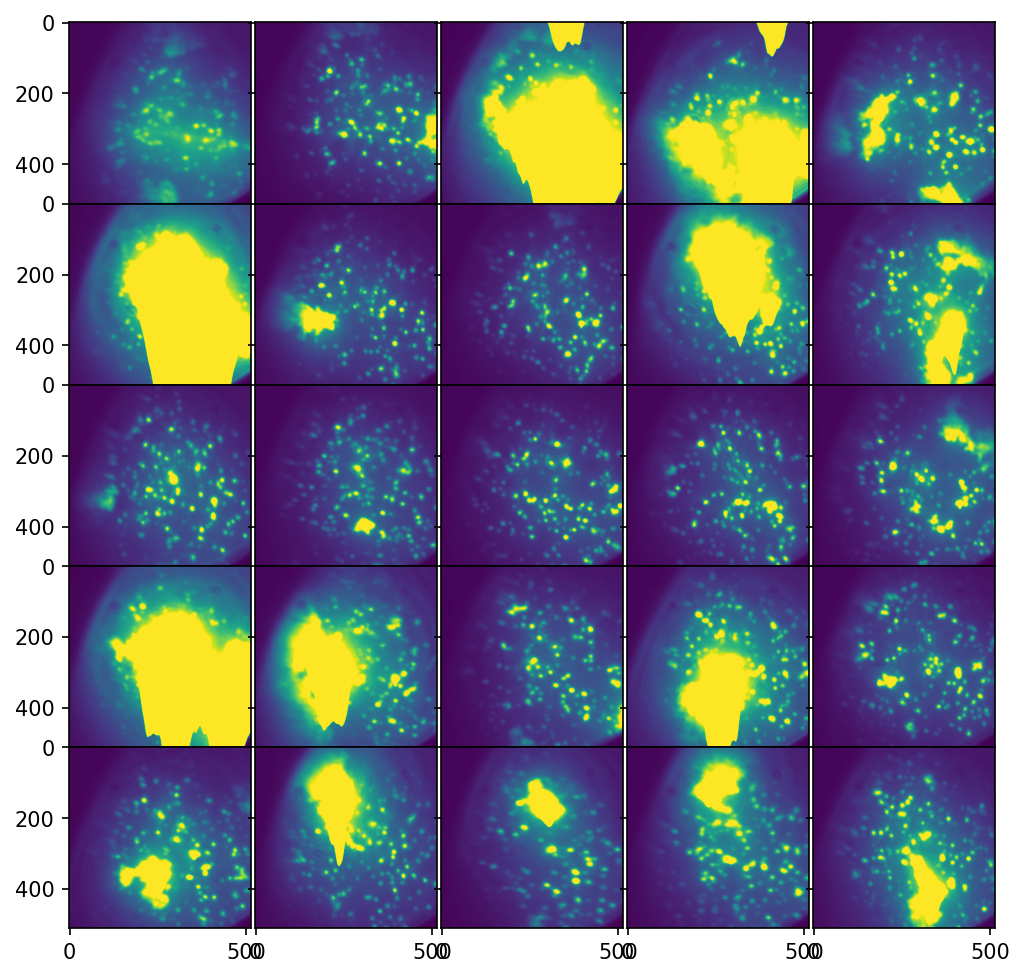

In [49]:
pics=BigImageSweep(0,0.1,0.02,0,0.1,0.02)

In [24]:
def RoughFocus(zmin, zmax,steps=30):
    Intensities=[]
    firstzs=np.linspace(zmin, zmax, steps)
    for z in firstzs:
        stg.MoveToZ(z)
        Intensities.append(sum(sum(cam.Snap(1)[0])))
    maxpos=np.argmax(Intensities)
    if(maxpos==0):
        print("Rough focus failed, max brightness is below lower limit")
        return False
    elif(maxpos==len(firstzs)):
        print("Rough focus failed, max brightness is above upper limit")
        return False
    else:
        Intensities=[]
        secondzs= np.arange(firstzs[maxpos-1], firstzs[maxpos+1],steps)
        for z in secondzs:
            stg.MoveToZ(z)
            Intensities.append(sum(sum(cam.Snap(1)[0])))
        maxpos=np.argmax(Intensities)
        print("Rough focus found at "+str(secondzs[maxpos]))
        return secondzs[maxpos]

In [33]:
x=stg.GetAxes()[0]
y=stg.GetAxes()[1]
z=stg.GetAxes()[2]

In [60]:
x.SVO(x.axes,values=True)
y.SVO(y.axes,values=True)
z.SVO(z.axes,values=True)


In [16]:
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  1.5 0 3.7305263157894735


In [8]:
stg.MoveToZ(3.5653061224489795)


#### time.sleep(1)
stg.MoveToX(2.5)
stg.MoveToY(0.0)
stg.MoveToZ(3.414)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

In [9]:
time.sleep(1)
stg.MoveToX(0)
stg.MoveToY(0.2)
stg.MoveToZ(-3.414)


#Query position
print("Stage at ",stg.X,stg.Y,stg.Z)

Stage at  0 0.2 -3.414


###### Scan Example

In [23]:
def MakeImageSweep(Zs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Zs)):
        
        # Move stage
        stg.MoveToZ(Zs[i])
        
        #Snap a pic
        pics.append(cam.Snap(1)[0])
        print(Zs[i])
        time.sleep(1)

    return pics

In [ ]:
Zs=np.linspace(3.55,3.65,100)
pics=MakeImageSweep(Zs,showthem=True)

3.55
3.551010101010101
3.5520202020202016
3.5530303030303028
3.554040404040404
3.555050505050505
3.5560606060606057
3.557070707070707
3.558080808080808
3.559090909090909
3.5601010101010098
3.561111111111111
3.562121212121212
3.563131313131313
3.564141414141414
3.565151515151515
3.566161616161616
3.567171717171717
3.568181818181818
3.569191919191919
3.57020202020202
3.571212121212121
3.572222222222222
3.573232323232323
3.574242424242424
3.575252525252525
3.576262626262626


In [ ]:
print(len(pics))
for i in range(0,len(pics)):
    
    #save to txt files
    np.savetxt('/Users/LabUser/Documents/Image captures/OliviaSveFrmCde/flourecence sweeps/sweep1/' + str(Zs[i]) + '.txt', pics[i])
    
    #Optionally display them
    fig=plt.figure(figsize=(3,3),dpi=150)
    fig.suptitle(Zs[i], fontsize=8)
    gs = fig.add_gridspec(1, 1, hspace=0, wspace=0)
    axes= gs.subplots(sharex='col', sharey='row')
    axes.imshow(pics[i])
    
    #plt.clim(2000,3000)

In [9]:
def MakeImageSweep(Xs,showthem=True):
    
    # Put the images in this array
    pics=[]
    
    for i in range(0,len(Xs)):
        
        # Move stage
        stg.MoveToZ(Xs[i])
        
        #Snap a pic
        #pics.append(cam.Snap(1)[0])
        print(Xs[i])
        time.sleep(1)

    return pics

In [10]:
Xs=np.linspace(3,-3,30)
pics=MakeImageSweep(Xs,showthem=True)

3.0
2.793103448275862
2.586206896551724
2.3793103448275863
2.1724137931034484
1.9655172413793103
1.7586206896551724
1.5517241379310345
1.3448275862068966
1.1379310344827587
0.9310344827586206
0.7241379310344827
0.5172413793103448
0.31034482758620685
0.10344827586206895
-0.10344827586206895
-0.31034482758620685
-0.5172413793103448
-0.7241379310344827
-0.9310344827586206
-1.137931034482759
-1.3448275862068968
-1.5517241379310347
-1.7586206896551726
-1.9655172413793105
-2.1724137931034484
-2.3793103448275863
-2.586206896551724
-2.793103448275862
-3.0


# Autofocus using Convolution only

In [8]:
import AFonSingles
from AFonSingles import AFonSingles
focussingles = AFonSingles(cam)

print("Starting Convolution")
numSweepsConvolution = 50

finalstartsweep = 3.5
finalendsweep = 3.53

print ("Convolution Round starting Z val: ",finalstartsweep)
print ("Convolution Round ending Z val: ", finalendsweep)

Zs4=np.linspace(finalstartsweep,finalendsweep,numSweepsConvolution)
zVals, pics= focussingles.MakeImageSweepForAF(Zs4, stg)

#now that zsweep is done and images are saved do AF thing to find most in focus
#returns the value of the z coordinate most in focus

zValinFocus = focussingles.main(pics, zVals)

print("In Focus Value: ", zValinFocus)

#move stage to the in focus place
stg.MoveToZ(zValinFocus)

Starting Convolution
Convolution Round starting Z val:  3.5
Convolution Round ending Z val:  3.53
3.5
3.500612244897959
3.501224489795918
3.5018367346938777
3.5024489795918368
3.503061224489796
3.503673469387755
3.5042857142857144
3.5048979591836735
3.5055102040816326
3.5061224489795917
3.5067346938775508
3.5073469387755103
3.5079591836734694
3.5085714285714285
3.5091836734693875
3.509795918367347
3.510408163265306
3.511020408163265
3.5116326530612243
3.5122448979591834
3.512857142857143
3.513469387755102
3.514081632653061
3.51469387755102
3.5153061224489797
3.5159183673469387
3.516530612244898
3.517142857142857
3.5177551020408164
3.5183673469387755
3.5189795918367346
3.5195918367346937
3.5202040816326527
3.5208163265306123
3.5214285714285714
3.5220408163265304
3.5226530612244895
3.523265306122449
3.523877551020408
3.524489795918367
3.5251020408163263
3.5257142857142854
3.526326530612245
3.526938775510204
3.527551020408163
3.528163265306122
3.5287755102040816
3.5293877551020407
3.53
[0

# Autofocus using Brightness only (Works well for microspheres)

Starting Z val:  3.4
Ending Z val:  3.8
3.4
3.44
3.48
3.52
3.56
3.5999999999999996
3.6399999999999997
3.6799999999999997
3.7199999999999998
3.76
3.8
Number of images taken in first z-sweep:  11


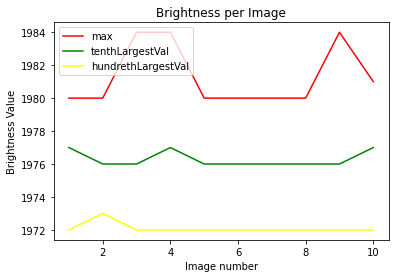

Brightest Z value at:  3.4
Image number:  1 out of  11  z-sweeps


In [6]:
#AF funtion, initiate stg and camera object first

import AutoFocusMicroSpheres
from AutoFocusMicroSpheres import AutoFocusMicroSpheres
focus = AutoFocusMicroSpheres(cam)

startsweep = 3.4
endsweep = 3.8

#do one more than what you need because the first image gets 
#intentionally deleted due to brightness caused by moving slide back to a low z value
numSweepsFirstRound = 11


print ("Starting Z val: ",startsweep)
print ("Ending Z val: ", endsweep)

Zs=np.linspace(startsweep,endsweep,numSweepsFirstRound)
autofocusZ=focus.Autofocus(Zs, stg)
Zss=Zs
print("Brightest Z value at: " , Zss[autofocusZ])
print("Image number: ", autofocusZ+1 , "out of ", numSweepsFirstRound, " z-sweeps")

# Full Autofocus

Round one starting Z val:  3.4
Round one ending Z val:  3.635
starting cell
3.4
3.407833333333333
3.4156666666666666
3.4234999999999998
3.4313333333333333
3.4391666666666665
3.447
3.454833333333333
3.4626666666666663
3.4705
3.478333333333333
3.4861666666666666
3.4939999999999998
3.5018333333333334
3.5096666666666665
3.5175
3.525333333333333
3.5331666666666663
3.541
3.548833333333333
3.5566666666666666
3.5645
3.5723333333333334
3.5801666666666665
3.5879999999999996
3.595833333333333
3.6036666666666664
3.6115
3.619333333333333
3.6271666666666667
3.635
Number of images taken in first z-sweep:  31


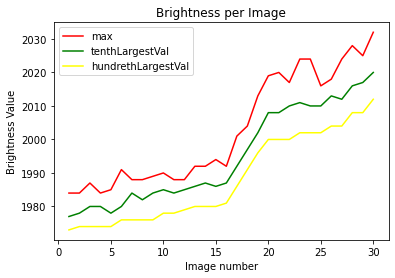

Round 1 Brightest Z value at:  3.6271666666666667
Image number:  30 out of  31  z-sweeps

Starting Final Convolution Round
Convolution Round starting Z val:  3.577166666666667
Convolution Round ending Z val:  3.6771666666666665
3.577166666666667
3.578176767676768
3.5791868686868686
3.5801969696969698
3.581207070707071
3.582217171717172
3.5832272727272727
3.584237373737374
3.585247474747475
3.586257575757576
3.5872676767676768
3.588277777777778
3.589287878787879
3.5902979797979797
3.591308080808081
3.592318181818182
3.593328282828283
3.5943383838383838
3.595348484848485
3.596358585858586
3.597368686868687
3.598378787878788
3.599388888888889
3.60039898989899
3.601409090909091
3.602419191919192
3.603429292929293
3.604439393939394
3.605449494949495
3.606459595959596
3.607469696969697
3.6084797979797982
3.609489898989899
3.6105
3.611510101010101
3.612520202020202
3.613530303030303
3.614540404040404
3.6155505050505052
3.616560606060606
3.617570707070707
3.618580808080808
3.6195909090909093
3

In [6]:
import CombinedAFMaster
from CombinedAFMaster import CombinedAFMaster
focussingles = CombinedAFMaster(cam, stg)

roundOneStartZVal = 3.4
roundOneEndZVal = 3.635

#do one more than what you need because the first image gets 
#intentionally deleted due to brightness caused by moving slide back to a low z value
numSweepsFirstRound = 31

numSweepsConvolution = 100

focussingles.main(roundOneStartZVal, roundOneEndZVal, numSweepsFirstRound, numSweepsConvolution)

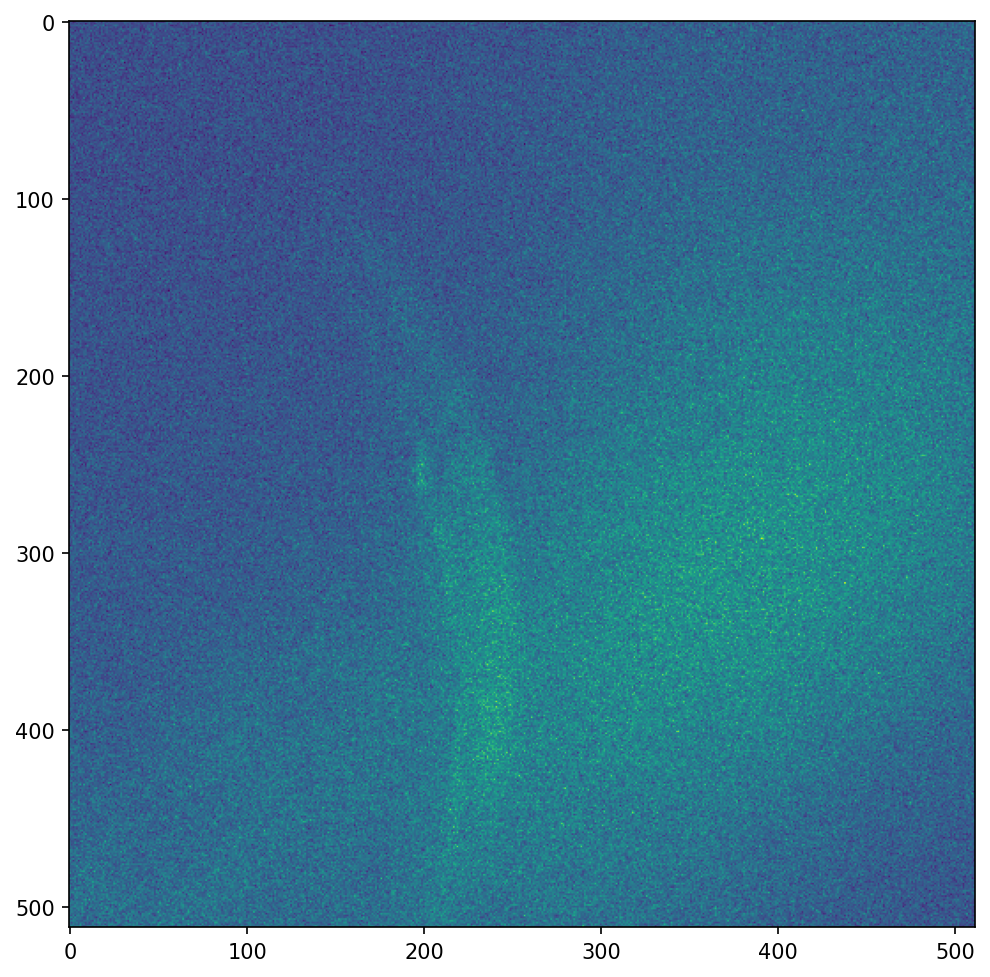

In [11]:
#cam=CamHamThread(exposure=0.3,SensitivityGain=1,CCDMode="EMCCD")
img=cam.Snap(1)[0]
fig=plt.figure(figsize=(8,8),dpi=150)
gs = fig.add_gridspec(1, 1, hspace=0, wspace=0)
axes= gs.subplots(sharex='col', sharey='row')
axes.imshow(img)

# Define focalplane

In [52]:
#run once to clear corner values
FocalPoints=[]
def RecordFocus():
    FocalPoints.append([stg.X,stg.Y,stg.Z])
    print(FocalPoints)
    return FocalPoints

In [53]:
#run four times (one at each corner)
import CombinedAFMaster
from CombinedAFMaster import CombinedAFMaster
focussingles = CombinedAFMaster(cam, stg)

#which corner value
#topleft:(6.5, 5)
topLeftX=6.5
topLeftY=5

#topright:(-6.5, 5)
topRightX=-6.5
topRightY=5

#bottomleft:(6.5, -4)
bottomLeftX=6.5
bottomLeftY=-4

#bottomright:(-6.5, -4)
bottomLeftX=-6.5
bottomLeftY=-4


stg.MoveToX(topLeftX)
stg.MoveToY(topLeftY)

roundOneStartZVal = 3.4
roundOneEndZVal = 3.8

#do one more than what you need because the first image gets 
#intentionally deleted due to brightness caused by moving slide back to a low z value
numSweepsFirstRound = 3
numSweepsConvolution = 2

focussingles.main(roundOneStartZVal, roundOneEndZVal, numSweepsFirstRound, numSweepsConvolution)

fourCorners = RecordFocus()
print("In Focus corner saved at ",stg.X,stg.Y,stg.Z)

Round one starting Z val:  3.4
Round one ending Z val:  3.8
starting cell


KeyboardInterrupt: 

In [34]:
#clears old data and saves the four corners to a file, only run once per silde

#opens the file and clears it
f = open('FocalPlane.txt', 'r+')
f.truncate(0)
f.seek(0)

#check to see if cleared
#FocalPoints=np.loadtxt("./FocalPlane.txt")
#print(FocalPoints)

#write new slide data to file
a_file = open("FocalPlane.txt", "a")
for row in fourCorners:
    np.savetxt(a_file, row)
a_file.close()


In [36]:
#run this to focus at any xy location in the focus plane

#this will throw an error if you have less than or greater than 4 focal pnts
FocalPoints=np.loadtxt("./FocalPlane.txt").reshape(4, 3)
FocalPoints=np.array(FocalPoints)
stg.DefineFocalPlane(FocalPoints)

stg.FocusAt(2.0,0.6)
print("Stg at ",stg.X,stg.Y,stg.Z)

[[-1.74 -1.    3.35]
 [-3.74 -3.    3.35]
 [-3.74  3.    3.35]
 [ 3.74  3.    3.55]]
[-1.74 -3.74 -3.74  3.74]
[-1. -3.  3.  3.]
[3.35 3.35 3.35 3.55]
Stg at  2.0 0.6 3.4872669674354584


# Continue original code below this

In [17]:
for i in range(0,len(pics)):
    #Optionally display them
    plt.figure(figsize=(5,5))
    plt.imshow(pics[i])
    plt.title(Zs[i])
    plt.clim(2000,5000)

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

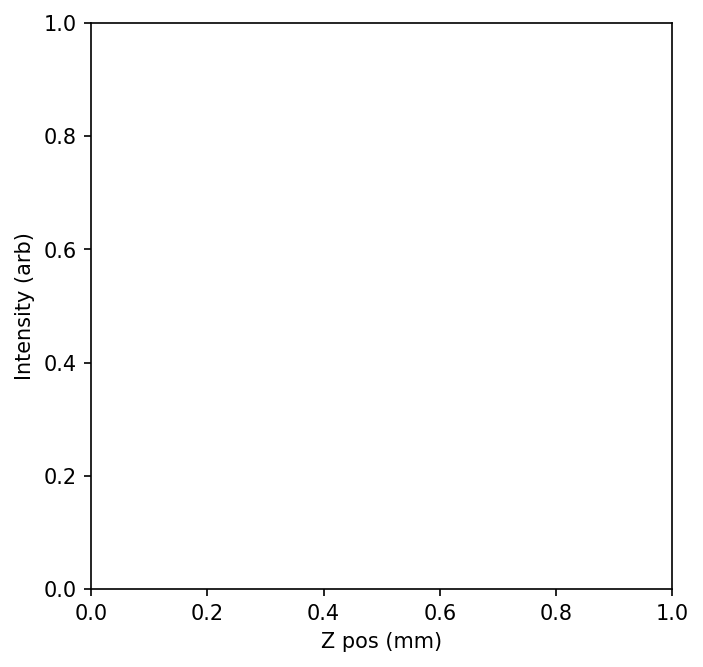

In [18]:
Integrals=[sum(sum(p)) for p in pics]
plt.figure(figsize=(5,5),dpi=150)
plt.xlabel("Z pos (mm)")
plt.ylabel("Intensity (arb)")
plt.plot(Zs,Integrals)

In [12]:
from scipy import interpolate

In [13]:
interpolate.interp2d?

(3.55, 3.6)

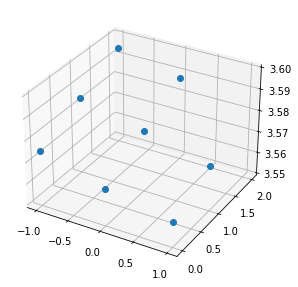

In [19]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(FocalPoints[:,0],FocalPoints[:,1],FocalPoints[:,2],'o')
fig.tight_layout()
ax.set_zlim(3.55,3.6)